# Python Part 3 - Pandas
***
<img src="http://codebasicshub.com/uploads/lang/py_pandas.png" width="400px"/>
<strong style="color:green">Book</strong>: Python for Data Analysis By William McKinney (Google it, to get free pdf)
***
**What we cover today**

- Some Linear Algebra
- Series
- Dataframes
- Basic Data Exploration
- Data Visualization
- Dataframe manipulations
<br>



In [107]:
## Import relevant Modules and submodules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Uncomment the following if yoou have ScikitLearn on your computer
from sklearn.datasets import load_boston
from sklearn.datasets import load_iris
from sklearn.datasets import fetch_california_housing

In [2]:
#Some options
%matplotlib inline  
# for static images and %matplotlib notebook: for interactive

np.random.seed(100)

##  Series Class
***
A one dimensional object of ordered  data (of **same type**) with *indexing*.

In [3]:
# The house type
house_type = pd.Series(["condo","house","house","condo","house", "condo","condo","house","house","condo","house"])

In [4]:
## Age of the house
house_age = pd.Series([35, 25, 30, 20, 40, 30, np.nan, 15, 22, 32, 24])
#Check the type of the data
house_age.dtype

dtype('float64')

In [5]:
type(np.nan)

float

In [6]:
# Just a test what if we have two types of elements in a series: 
test = pd.Series([3.4,7,13, "Hi"])

In [7]:
# What kind of data is in the series
print (test.dtype)
print (test.values)

object
[3.4 7 13 'Hi']


In [8]:
# Sorting a series
house_type.sort_values()

0     condo
3     condo
5     condo
6     condo
9     condo
1     house
2     house
4     house
7     house
8     house
10    house
dtype: object

In [9]:
newindex = house_type.argsort()
newindex

0      0
1      3
2      5
3      6
4      9
5      1
6      2
7      4
8      7
9      8
10    10
dtype: int64

In [10]:
house_age[newindex]

0     35.0
3     20.0
5     30.0
6      NaN
9     32.0
1     25.0
2     30.0
4     40.0
7     15.0
8     22.0
10    24.0
dtype: float64

### DataFrame Class
***
2D data with column and row indices. Every column is made a series having the row-index of the dataframe.
<img src="http://bookdata.readthedocs.io/en/latest/_images/base_01_pandas_5_0.png" width="400px" />
Images: http://bookdata.readthedocs.io/en/latest/_images/base_01_pandas_5_0.png

### Dataframe from a dictionary

In [11]:
#Dataframe from a dictionary

carpet_area = np.array([850, 1200, 1500, 900, 2100, 800, 1100, 2600, 1800, 1000, 1300])
house_price = np.array([190, 250, 300, 200, 350, 170, 210, 400, 360, 230, 260])

# A dictionary having key as column names and values as the array of numbers
data={"carpet": carpet_area, "price":house_price}

# Creating a data-frame with a dictionary having the data
house_price_df = pd.DataFrame(data)



In [12]:
# Inspecting the Dataframe
house_price_df.head()

,carpet,price
0,850,190
1,1200,250
2,1500,300
3,900,200
4,2100,350


In [13]:
# See the last 3 columns
house_price_df.tail(3)

,carpet,price
8,1800,360
9,1000,230
10,1300,260


In [14]:
house_price_df.tail(3).head(2) # what shoudl be the output

,carpet,price
8,1800,360
9,1000,230


In [15]:
# look at all columns, datatypes, missing entries etc.
house_price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   carpet  11 non-null     int64
 1   price   11 non-null     int64
dtypes: int64(2)
memory usage: 304.0 bytes


#### Adding new columns to a dataframe

In [16]:
#Add new column to DF
house_price_df['type'] = house_type[0:10]
house_price_df['age'] = house_age[0:10]

# What will the following code do?
# house_price_df['type'] = house_type[0:10:2]

# Look at the DF now
#house_price_df.head()
house_price_df.tail(11)

,carpet,price,type,age
0,850,190,condo,35.0
1,1200,250,house,25.0
2,1500,300,house,30.0
3,900,200,condo,20.0
4,2100,350,house,40.0
5,800,170,condo,30.0
6,1100,210,condo,NaN
7,2600,400,house,15.0
8,1800,360,house,22.0
9,1000,230,condo,32.0


In [18]:
print (house_price_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   carpet  11 non-null     int64  
 1   price   11 non-null     int64  
 2   type    10 non-null     object 
 3   age     9 non-null      float64
dtypes: float64(1), int64(2), object(1)
memory usage: 480.0+ bytes
None


#### Finding Columns of a given datatype

In [19]:
# Finding only the types of the columns
print (house_price_df.dtypes)

carpet      int64
price       int64
type       object
age       float64
dtype: object


In [20]:
# Data type of the columns
print (house_price_df.dtypes == int)

carpet     True
price      True
type      False
age       False
dtype: bool


In [21]:
# find columns with int types
hpdf2 = house_price_df.loc[:, house_price_df.dtypes == int] 
#[row_list, col_list]
hpdf2.head(2)

,carpet,price
0,850,190
1,1200,250


In [22]:
house_price_df.dtypes is not object

True

In [26]:
hpdf3 = house_price_df.loc[:, house_price_df.dtypes != object]
hpdf3.head(2)

,carpet,price,age
0,850,190,35.0
1,1200,250,25.0


In [22]:
hpdf3 = house_price_df.loc[:, house_price_df.dtypes == object]
hpdf3.head(2)

,type
0,condo
1,house


In [27]:
hpdf2.iloc[0,0]  = 820

/Users/upendraprasad/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/upendraprasad/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


<div class="alert alert-block alert-danger">
Note that changing a dataframe which is a subset of another can change the original dataframe. So be careful.
</div>

In [28]:
house_price_df.head(3)# By dafult 5 rows

,carpet,price,type,age
0,850,190,condo,35.0
1,1200,250,house,25.0
2,1500,300,house,30.0


In [29]:
#Last 4 rows
hpdf2.head()

,carpet,price
0,820,190
1,1200,250
2,1500,300
3,900,200
4,2100,350


In [30]:
# Statistical Description of Numerical Columns
house_price_df.describe(percentiles=[.1, .4, .8])
# use include='all' argument and see what happens

,carpet,price,age
count,11.000000,11.000000,9.000000
mean,1377.272727,265.454545,27.666667
std,575.049405,76.858784,7.858117
min,800.000000,170.000000,15.000000
10%,850.000000,190.000000,19.000000
40%,1100.000000,230.000000,26.000000
50%,1200.000000,250.000000,30.000000
80%,1800.000000,350.000000,33.200000
max,2600.000000,400.000000,40.000000


In [31]:
#Frequency Dist.
house_price_df.type.value_counts()

# Note: house_price_df.type is a series

condo    5
house    5
Name: type, dtype: int64

In [33]:
# Statistics on individual columns
print ("20% point: {}".format(house_price_df.age.quantile(0.2)) ) #20%-ile point

# likewise mean,  std, max, min, quantile
print( house_price_df.age.mean())

20% point: 21.2
27.666666666666668


In [34]:
# A subset of the dataframe
hpdf3 = house_price_df[['carpet', 'age']]
hpdf3.head(2)

,carpet,age
0,850,35.0
1,1200,25.0


In [35]:
# can we change the entries inhpdf3 without affecting the original dataframe
hpdf3.iloc[0,0] = 860

/Users/upendraprasad/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [36]:
hpdf3.head(2)

,carpet,age
0,860,35.0
1,1200,25.0


In [37]:
house_price_df.head(2)

,carpet,price,type,age
0,850,190,condo,35.0
1,1200,250,house,25.0


In [38]:
# Another way of creating a Dataframe for testing purposes
col_names = ['A', 'B', 'C', 'D']
#OR col_names = list("ABCD")
# get some 2D data
test_data = np.random.randint(0, high = 20,size=(10,4))


some_df = pd.DataFrame(data=test_data, columns=col_names)
some_df.head()

,A,B,C,D
0,8,3,7,15
1,16,10,2,2
2,2,14,2,17
3,16,15,4,11
4,16,9,2,12


#### Find rows is a dataframe that have missing entries

In [39]:
print ("The shape of the data frame is: \n")
print (some_df.shape )
#
# The attribute .shape gives the number of rows and columns in a dataframe

The shape of the data frame is: 

(10, 4)


In [40]:
#Copying a dataframe: NOTE: Assignment only creates a new reference
hpdf =  house_price_df.copy()

In [41]:
hpdf.isnull() # what does this do?

,carpet,price,type,age
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
5,False,False,False,False
6,False,False,False,True
7,False,False,False,False
8,False,False,False,False
9,False,False,False,False


In [42]:
hpdf.isnull().any(axis=1) # axis=1, denotes horizontal axis

0     False
1     False
2     False
3     False
4     False
5     False
6      True
7     False
8     False
9     False
10     True
dtype: bool

In [43]:
hpdf.isnull().any(axis=0) # axis = 0, means vertical look up

carpet    False
price     False
type       True
age        True
dtype: bool

In [44]:
# Investigate NULL/Missing Entries
## Following code output all rows with missing values
hpdf[hpdf.isnull().any(axis=1)]

,carpet,price,type,age
6,1100,210,condo,NaN
10,1300,260,NaN,NaN


In [45]:
# Investigate NULL/Missing Entries
## Following code output all columns with missing values
hpdf.loc[:,hpdf.isnull().any(axis=0)]

,type,age
0,condo,35.0
1,house,25.0
2,house,30.0
3,condo,20.0
4,house,40.0
5,condo,30.0
6,condo,NaN
7,house,15.0
8,house,22.0
9,condo,32.0


In [47]:
# HOW to get the row and column indices
print (hpdf.columns)
print (hpdf.index)

Index(['carpet', 'price', 'type', 'age'], dtype='object')
RangeIndex(start=0, stop=11, step=1)


#### Saving a dataframe to the computer as csv file

In [48]:
# How to save a Dataframe to a csv file, excel file, Json file etc.
hpdf.to_csv("./HousingPrice.csv" )

In [49]:
# From dataframe to dictionary
dict1 = hpdf.to_dict()
print (dict1)

{'carpet': {0: 850, 1: 1200, 2: 1500, 3: 900, 4: 2100, 5: 800, 6: 1100, 7: 2600, 8: 1800, 9: 1000, 10: 1300}, 'price': {0: 190, 1: 250, 2: 300, 3: 200, 4: 350, 5: 170, 6: 210, 7: 400, 8: 360, 9: 230, 10: 260}, 'type': {0: 'condo', 1: 'house', 2: 'house', 3: 'condo', 4: 'house', 5: 'condo', 6: 'condo', 7: 'house', 8: 'house', 9: 'condo', 10: nan}, 'age': {0: 35.0, 1: 25.0, 2: 30.0, 3: 20.0, 4: 40.0, 5: 30.0, 6: nan, 7: 15.0, 8: 22.0, 9: 32.0, 10: nan}}


In [50]:
hpdf.head(2)

,carpet,price,type,age
0,850,190,condo,35.0
1,1200,250,house,25.0


In [51]:
#Rename Columns
hpdf.rename(columns={"carpet": "carpet area"}, inplace=True)
# inplace, for what?

In [52]:
#Rename Columns
hpdf.rename(columns={"carpet area": "carpet_area"}, inplace=True)
# inplace, for what?

In [53]:
hpdf.carpet_area[1:5]

1    1200
2    1500
3     900
4    2100
Name: carpet_area, dtype: int64

#### Dropping rows or columns
***
-  Drop a row with missing entries
-  Drop duplicate rows
-  Drop a row with given indices
-  Drop a column with given indices.

In [54]:
# Drop rows having null values
hpdf.dropna(how='any') # or how='all'
# What will inplace argument do?

,carpet_area,price,type,age
0,850,190,condo,35.0
1,1200,250,house,25.0
2,1500,300,house,30.0
3,900,200,condo,20.0
4,2100,350,house,40.0
5,800,170,condo,30.0
7,2600,400,house,15.0
8,1800,360,house,22.0
9,1000,230,condo,32.0


<div class="alert alert-block alert-info">
If instead a how='all' is used, a row will be removed only when all its entries are NA/NaN.
</div>

In [55]:
hpdf.drop_duplicates()

,carpet_area,price,type,age
0,850,190,condo,35.0
1,1200,250,house,25.0
2,1500,300,house,30.0
3,900,200,condo,20.0
4,2100,350,house,40.0
5,800,170,condo,30.0
6,1100,210,condo,NaN
7,2600,400,house,15.0
8,1800,360,house,22.0
9,1000,230,condo,32.0


In [56]:
hpdf.drop("age", axis=1) # Drop a column

,carpet_area,price,type
0,850,190,condo
1,1200,250,house
2,1500,300,house
3,900,200,condo
4,2100,350,house
5,800,170,condo
6,1100,210,condo
7,2600,400,house
8,1800,360,house
9,1000,230,condo


In [57]:
hpdf.drop([0, 1], axis=0, inplace=True) # drop some rows:[0, 1]

In [58]:
hpdf.head(3)

,carpet_area,price,type,age
2,1500,300,house,30.0
3,900,200,condo,20.0
4,2100,350,house,40.0


In [59]:
hpdf =house_price_df.copy()

#### Data Imputation: Filling up missing entries with substitute values.
***


In [60]:
# NA filled by average of the column
hpdf.age.fillna(hpdf.age.mean(), inplace=True) 

# NA filled by median of the column
hpdf.age.fillna(hpdf.age.median(), inplace=True) 

# NA filled by mode of the column
hpdf.age.fillna(hpdf.age.mode(), inplace=True) 

<div class="alert alert-block alert-info">
Using the parameter <strong>'inplace = True'</strong>, makes the chages in the original dataframe, otherwise a new dataframe is returned.
</div>

#### Changing datatype of a column

In [61]:
# Change Column data type
s1 = pd.Series(["22.4", "22.9"])
s1.dtype
s1 = s1.astype(float) # Changed the data-type and assigned to the original series
#Check the change of datatype
s1.dtype

# df['col_name'] = df.col_name.astype(float)

dtype('float64')

### Reading data from CSV, Excel files
***
-  Reading from a website url
-  Reading from a file on a given path on the computer

In [63]:
# Reading EXCEL files
#Default on Credit Cards Data from UCI datasets
filename = './default of credit card clients.xls'
ccd = pd.read_excel(filename, skiprows=1)

# WHAT IF: there are multiple sheets?

In [64]:
# Shell script from Jupyter
!head -n 5 HousingPrice.csv | tail -n 1

# Google linux/unix commands for data science

3,900,200,condo,20.0


In [65]:
#Reading csv files from online sources
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

#Get the column Names from description of data
col_names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]

# Read a CSV file
iris = pd.read_csv(url, names=col_names )

In [66]:
ccd.head(2)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1


In [67]:
ccd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [68]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [69]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [70]:
#Note iris.class.unique() will not work. Why?
iris['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

### Data-frame Visualization
<hr>
- For Matplotlib Example: https://matplotlib.org/gallery.html

- For Pandas Visualization: https://pandas.pydata.org/pandas-docs/stable/visualization.html

- Look at Seaborn: http://seaborn.pydata.org/examples/

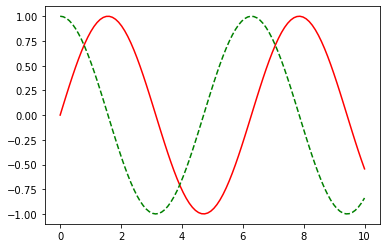

In [71]:
# Make a list of 100 equally spaced numbers between 0 and 10 
x = np.linspace(0, 10, 100)

fig = plt.figure()
plt.plot(x, np.sin(x), 'r-')
plt.plot(x, np.cos(x), 'g--');

fig.savefig('my_figure.png')

Text(0, 0.5, 'Price')

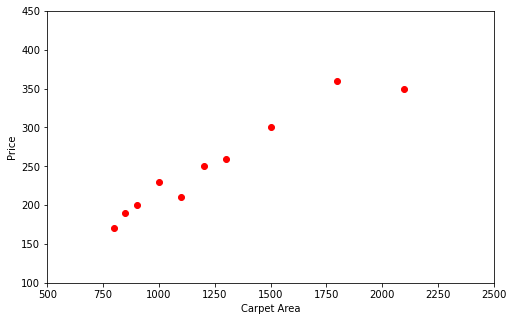

In [72]:
# Plot of the points
plt.figure(figsize=(8,5))
plt.plot(hpdf.carpet, hpdf.price, 'ro')
plt.axis([500, 2500, 100, 450])
plt.xlabel("Carpet Area")
plt.ylabel("Price")

<AxesSubplot:>

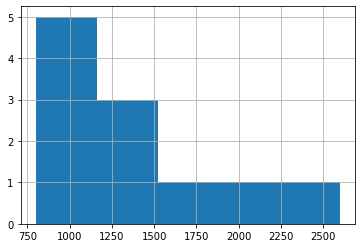

In [73]:
# Histograms
hpdf.carpet.hist(bins=5)

<AxesSubplot:>

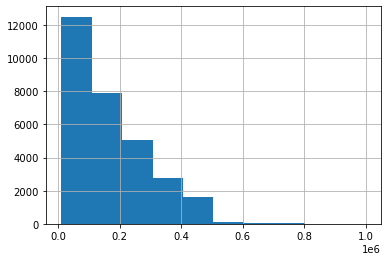

In [74]:
ccd.LIMIT_BAL.hist()

<AxesSubplot:>

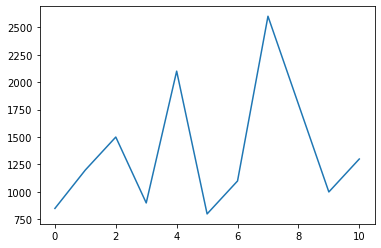

In [75]:
#Lineplot
hpdf.carpet.plot()

<AxesSubplot:>

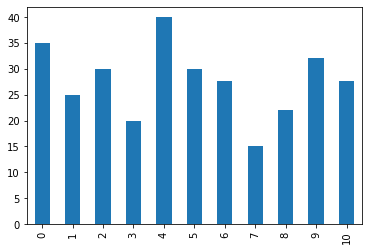

In [76]:
hpdf.age.plot(kind='bar')

<AxesSubplot:>

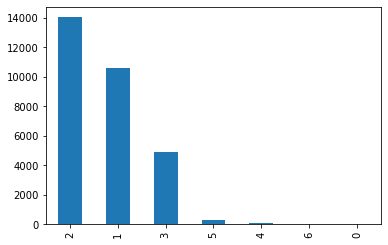

In [77]:
ccd.EDUCATION.value_counts().plot(kind='bar')

<AxesSubplot:>

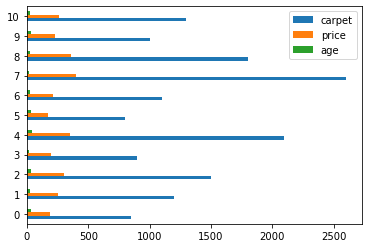

In [78]:
hpdf.plot(kind='barh')

<AxesSubplot:ylabel='Frequency'>

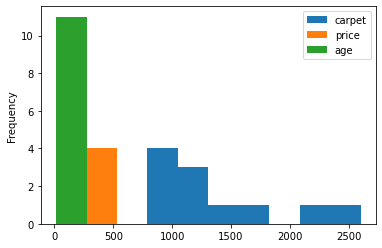

In [79]:
hpdf.plot.hist()

<AxesSubplot:>

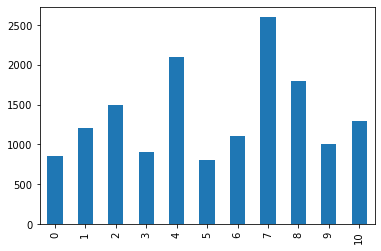

In [80]:
hpdf.carpet.plot(kind='bar')

<AxesSubplot:title={'center':'carpet'}, xlabel='type'>

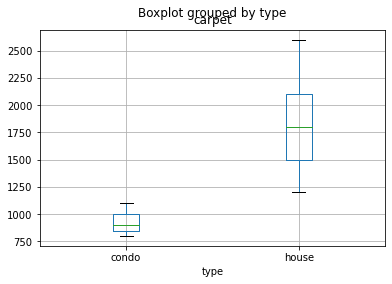

In [81]:
hpdf.boxplot(column=['carpet'], by='type', figsize=(6,4))

<AxesSubplot:title={'center':'LIMIT_BAL'}, xlabel='EDUCATION'>

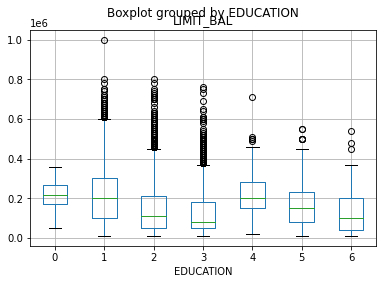

In [82]:
ccd.boxplot(column="LIMIT_BAL", by="EDUCATION")

<AxesSubplot:title={'center':'LIMIT_BAL'}, xlabel='MARRIAGE'>

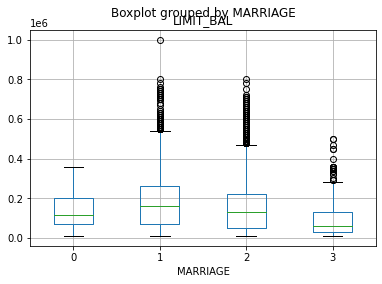

In [83]:
ccd.boxplot(column="LIMIT_BAL", by="MARRIAGE")

<AxesSubplot:title={'center':'LIMIT_BAL'}, xlabel='SEX'>

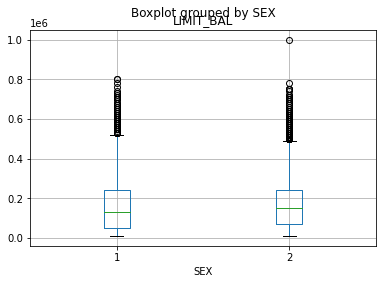

In [84]:
ccd.boxplot(column="LIMIT_BAL", by="SEX")

<AxesSubplot:xlabel='MARRIAGE', ylabel='LIMIT_BAL'>

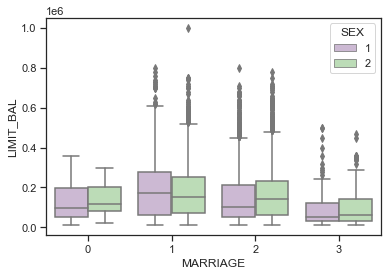

In [85]:
sns.set(style="ticks")
sns.boxplot(x="MARRIAGE", y="LIMIT_BAL",hue="SEX", data=ccd, palette="PRGn")

Source: https://seaborn.pydata.org/examples/index.html

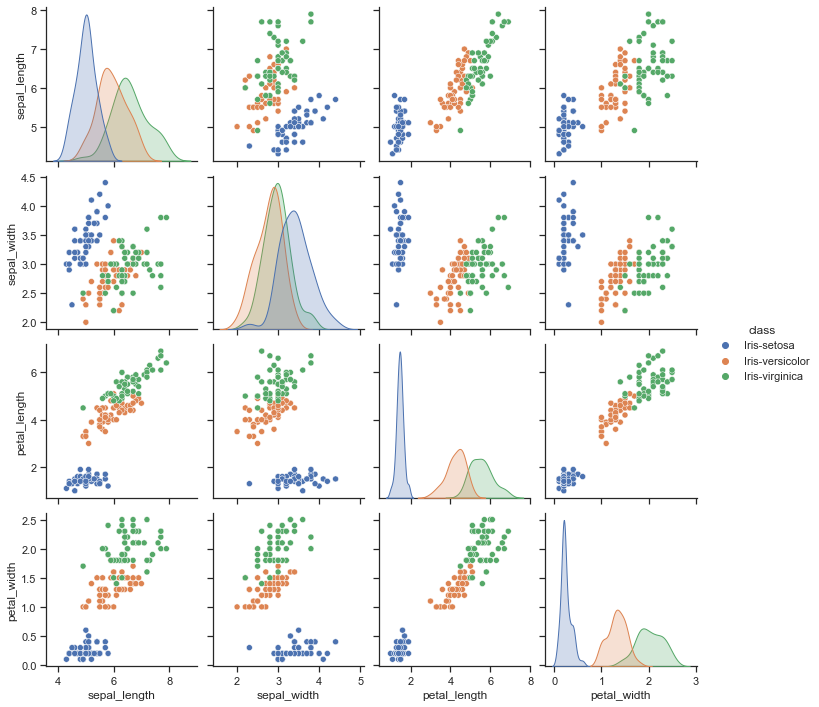

In [86]:
import seaborn as sns
sns.set(style="ticks")

# Pair-plot: for visualization of pairs of features
sns.pairplot(iris, hue="class")

In [87]:
# What are the different unique Values in a categorical column
iris["class"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [88]:
iris["class"].replace({'Iris-setosa':1, 'Iris-versicolor':2, 'Iris-virginica':3},inplace=True)

In [90]:
print (iris.info())
iris.head(2)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
None


,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1


<AxesSubplot:>

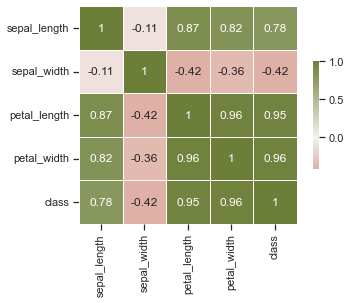

In [91]:
# Draw the heatmap 

# Generate a custom diverging colormap
cm = sns.diverging_palette(20, 100, as_cmap=True)

sns.heatmap(iris.corr(), vmax=1.0, center=0,annot=True, cmap = cm,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [92]:
#MAgic Command List
%lsmagic

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %conda  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  %%prun  %%pypy  %%

In [93]:
# Find all the variables created so far
%whos

Variable         Type                       Data/Info
-----------------------------------------------------
carpet_area      ndarray                    11: 11 elems, type `int64`, 88 bytes
ccd              DataFrame                            ID  LIMIT_BAL  <...>[30000 rows x 25 columns]
cm               LinearSegmentedColormap    <matplotlib.colors.Linear<...>object at 0x7ff924b7ce50>
col_names        list                       n=5
data             dict                       n=2
dict1            dict                       n=4
fig              Figure                     Figure(432x288)
filename         str                        ./default of credit card clients.xls
house_age        Series                     0     35.0\n1     25.0\n2<...>0    24.0\ndtype: float64
house_price      ndarray                    11: 11 elems, type `int64`, 88 bytes
house_price_df   DataFrame                      carpet  price   type <...> 1300    260    NaN   NaN
house_type       Series                     0

### Selection: Filtering a dataframe 
***

In [94]:
# Get all data in a 2D matrix
data_mat = iris.iloc[:,0:4].values # [list of row numbers, list of col numbers]

In [95]:
# Exploring the data: Selection
iris[["sepal_length", "sepal_width"]][0:3] # How does this work?

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2


In [96]:
iris.loc[0:5, ["sepal_length", "sepal_width"]]
#Note that 5 is included.

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
5,5.4,3.9


In [97]:
iris.iloc[0:5,1:3 ] # How about at, iat, ix (for single value)
# Note that 5 is not included

,sepal_width,petal_length
0,3.5,1.4
1,3.0,1.4
2,3.2,1.3
3,3.1,1.5
4,3.6,1.4


In [98]:
# DIfference between iloc and loc
## for loc one needs to provide the row and column indices (names)
## for iloc, you provide row_num and col_num

In [99]:
%timeit ccd.loc[3, "PAY_6"] # Google magic commands for ipython

4.71 µs ± 18.4 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [ ]:
#.at() and .iat() in place of loc and iloc for accessing a sibgle element.

In [100]:
%timeit ccd.at[3, "PAY_6"]

2.48 µs ± 13.2 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [101]:
#print iris.sepal_width > 4
#print iris.sepal_width < 4.5 
iris[(iris.sepal_width < 3.8) & (iris.sepal_width > 3.5)]

,sepal_length,sepal_width,petal_length,petal_width,class
4,5.0,3.6,1.4,0.2,1
10,5.4,3.7,1.5,0.2,1
21,5.1,3.7,1.5,0.4,1
22,4.6,3.6,1.0,0.2,1
48,5.3,3.7,1.5,0.2,1
109,7.2,3.6,6.1,2.5,3


In [103]:
# any and all
print (any([True, False, False])) # Returns True
print (all([True, False, False]))

True
False


In [104]:
#One hot encoding of categorical variables
pd.get_dummies(iris, columns=['class']).head()

,sepal_length,sepal_width,petal_length,petal_width,class_1,class_2,class_3
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


In [105]:
# Correlation
##np.corrcoef(data_mat.T)
iris.corr()
#iris["class"].replace("Iris-setosa", 1, inplace=True)
#iris["class"].replace("Iris-versicolour", 2,  inplace=True)
#iris["class"].replace("Iris-virginica",3,  inplace=True)
#iris["class"] = iris["class"].astype(float)
#iris.corrwith(class_label)

,sepal_length,sepal_width,petal_length,petal_width,class
sepal_length,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal_width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal_length,0.871754,-0.420516,1.000000,0.962757,0.949043
petal_width,0.817954,-0.356544,0.962757,1.000000,0.956464
class,0.782561,-0.419446,0.949043,0.956464,1.000000


### California Housing Data
***
Do the following
1. Use the contained data to create a dataframe
2. Explore the data (head, tail, info, dtypes, shape etc.)
3. Visualize the distribution different features.
4. Explore the correlation between different columns and visualize it.

In [108]:

cal = fetch_california_housing()

In [85]:
print cal.DESCR

California housing dataset.

The original database is available from StatLib

    http://lib.stat.cmu.edu/datasets/

The data contains 20,640 observations on 9 variables.

This dataset contains the average house value as target variable
and the following input variables (features): average income,
housing average age, average rooms, average bedrooms, population,
average occupation, latitude, and longitude in that order.

References
----------

Pace, R. Kelley and Ronald Barry, Sparse Spatial Autoregressions,
Statistics and Probability Letters, 33 (1997) 291-297.




In [93]:
california = pd.DataFrame(data=cal.data, columns=cal.feature_names)

In [94]:
california["AveValue"] = cal.target

In [96]:
print california.info()
california.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
MedInc        20640 non-null float64
HouseAge      20640 non-null float64
AveRooms      20640 non-null float64
AveBedrms     20640 non-null float64
Population    20640 non-null float64
AveOccup      20640 non-null float64
Latitude      20640 non-null float64
Longitude     20640 non-null float64
AveValue      20640 non-null float64
dtypes: float64(9)
memory usage: 1.4 MB
None


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,AveValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### Assignment 
***
Load and Explore the data at the given url.

In [109]:
url2 = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data-original"
col_names = ['mpg', 'cylinders', 'displacement', 
             'horsepower', 'weight', 'acceleration',
                            'model', 'origin', 'car_name']

In [111]:
mileage = pd.read_csv(url2, delim_whitespace=True,names=col_names)

In [112]:
mileage.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino
